# This lecture was assisted by ChatGPT, and it fudged up bad.  
## I fixed it, but it took me a bit of time to even realize it fudged up.
Most of the code, and most of the interpertation was generated by ChatGTP.  I tried to leave the exact input and output to what I asked it. However....... 

### **You cannot blindly follow what ChatGPT does** 
* ChatGPT made a huge mistake in the example below (I left it in to see if yall can see it too).  
* Without knowing what it was doing, would LOOK fine, but very very wrong.  
* Gotta be careful when you use ChatGPT.  When it is wrong, it sounds very right. 

Here is a story of a lawyer that did blindly follow ChatGPT and it made up mad fake stuff, he asked it if it was fake or not and it said, nahh they real.  He used them in court and got in crazy trouble. 

* Forbes - [Lawyer Used ChatGPT In Court—And Cited Fake Cases. A Judge Is Considering Sanctions](https://www.forbes.com/sites/mollybohannon/2023/06/08/lawyer-used-chatgpt-in-court-and-cited-fake-cases-a-judge-is-considering-sanctions/?sh=15e02fe47c7f)
* NYT - [The ChatGPT Lawyer Explains Himself](https://www.nytimes.com/2023/06/08/nyregion/lawyer-chatgpt-sanctions.html)


In [26]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


df = pd.read_csv('data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Only using AGE as a feature

Optimization terminated successfully.
         Current function value: 0.509254
         Iterations 5
Accuracy Score: 0.753488
F1 Score: 0.690058
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.2446
Time:                        17:00:32   Log-Likelihood:                -254.12
converged:                       True   LL-Null:                       -336.39
Covariance Type:            nonrobust   LLR p-value:                 1.857e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5133      0.287      5.280      0.000       0.9

,const,age,sex_male,y_pred_proba,y_pred
149,1.0,42.0,1,0.179105,0
407,1.0,3.0,1,0.246270,0
53,1.0,29.0,0,0.770834,1
369,1.0,24.0,0,0.779851,1
818,1.0,43.0,1,0.177588,0
...,...,...,...,...,...
676,1.0,24.5,1,0.207309,0
493,1.0,71.0,1,0.139111,0
479,1.0,2.0,0,0.816467,1
278,1.0,7.0,1,0.238663,0


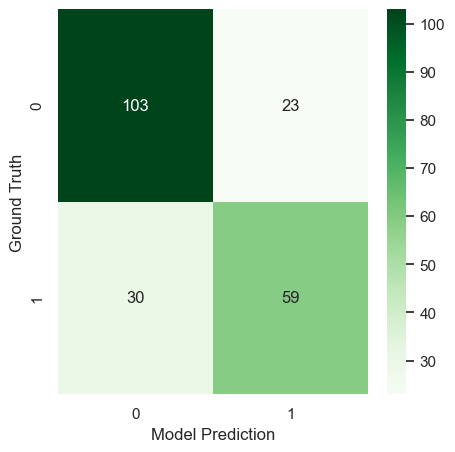

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load and Inspect
df = pd.read_csv('data/titanic.csv')

# Inspect, we did this in the previous lecture file. 

# Select and Engineer. 
features = ['age', 'sex_male']
target = 'survived'

# Drop rows with missing target or missing important features
df.dropna(subset=['survived', 'age', 'fare'], inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['sex', 'pclass'], dtype=int, drop_first=True)

# Define Features and Target
X = df[features]  
y = df[target]


# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Adding a constant term for intercept 
X_train_sm = sm.add_constant(X_train)   


# Fit the Logistic Regression Model using Statsmodels
logit_model = sm.Logit(endog=y_train, exog=X_train_sm)
result = logit_model.fit()

# Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (using 0.5 as threshold)

## EVALUATE 

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 ACCURACY
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.ylabel('Ground Truth')
plt.xlabel('Model Prediction');



# Add to our dataframe to interprept 
X_test_sm['y_pred_proba'] = y_pred_prob
X_test_sm['y_pred'] = y_pred

# Print the summary of the model
print(result.summary())

X_test_sm

In [41]:
import numpy as np

### THIS FUNCTION WAS FULLLY WRITTEN BY GPT

def interpret_statsmodels_logit(result):
    """
    Converts the coefficients of a statsmodels Logit object (log-odds) into odds ratios and percentage changes.

    Parameters:
    result (statsmodels object): The fitted statsmodels logistic regression model.

    Returns:
    None: Prints the log-odds, odds ratio, and percentage change for each coefficient.
    """
    # Extract the coefficients from the statsmodels results object
    coefficients = result.params

    # Loop through each coefficient and interpret it
    print("Interpretation of Logistic Regression Coefficients:")
    print("-------------------------------------------------")
    for feature, log_odds in coefficients.items():
        # Convert log-odds to odds ratio
        odds_ratio = np.exp(log_odds)

        # Convert odds ratio to percentage change
        percentage_change = (odds_ratio - 1) * 100

        # Print the interpretation
        print(f"Feature: {feature}")
        print(f"  Log-Odds: {log_odds:.4f}")
        print(f"  Odds Ratio: {odds_ratio:.4f}")
        print(f"  Percentage Change in Odds: {percentage_change:.2f}%")
        print("")

# Example usage
# Assuming `result` is your fitted statsmodels logistic regression object from the earlier code
interpret_statsmodels_logit(result)


Interpretation of Logistic Regression Coefficients:
-------------------------------------------------
Feature: const
  Log-Odds: 1.5133
  Odds Ratio: 4.5417
  Percentage Change in Odds: 354.17%

Feature: age
  Log-Odds: -0.0104
  Odds Ratio: 0.9897
  Percentage Change in Odds: -1.03%

Feature: sex_male
  Log-Odds: -2.6008
  Odds Ratio: 0.0742
  Percentage Change in Odds: -92.58%



Optimization terminated successfully.
         Current function value: 0.433508
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            5
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.3569
Time:                        17:00:58   Log-Likelihood:                -216.32
converged:                       True   LL-Null:                       -336.39
Covariance Type:            nonrobust   LLR p-value:                 7.153e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7716      0.649      7.351      0.000       3.499       6.044
age           -0.0460      0.

,const,age,fare,sex_male,pclass_2,pclass_3,y_pred_proba,y_pred
149,1.0,42.0,13.0000,1,1,0,0.130632,0
407,1.0,3.0,18.7500,1,1,0,0.466203,0
53,1.0,29.0,26.0000,0,1,0,0.799094,1
369,1.0,24.0,69.3000,0,0,0,0.963293,1
818,1.0,43.0,6.4500,1,0,1,0.042349,0
...,...,...,...,...,...,...,...,...
676,1.0,24.5,8.0500,1,0,1,0.093033,0
493,1.0,71.0,49.5042,1,0,0,0.177602,0
479,1.0,2.0,12.2875,0,0,1,0.815528,1
278,1.0,7.0,29.1250,1,0,1,0.168773,0


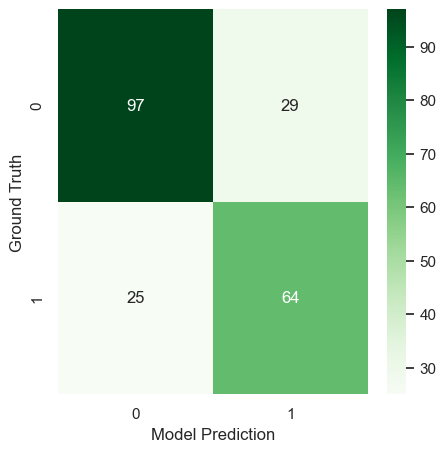

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Step 1: Load the Titanic Dataset
# Assuming you have the dataset as a CSV file named 'titanic.csv'.
df = pd.read_csv('data/titanic.csv')

# Drop rows with missing target or missing important features
df.dropna(subset=['survived', 'age', 'fare'], inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['sex', 'pclass'], dtype=int, drop_first=True)


features = ['age', 'fare', 'sex_male', 'pclass_2', 'pclass_3']
target = 'survived'

# Step 4: Define Features and Target
X = df[features]  
y = df[target]


# # Step 6: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Fit the Logistic Regression Model using Statsmodels
X_train_sm = sm.add_constant(X_train)  # Adding a constant term for intercept
logit_model = sm.Logit(endog=y_train, exog=X_train_sm)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (using 0.5 as threshold)

## EVALUATE 

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 ACCURACY
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.ylabel('Ground Truth')
plt.xlabel('Model Prediction');



# Add to our dataframe to interprept 
X_test_sm['y_pred_proba'] = y_pred_prob
X_test_sm['y_pred'] = y_pred
X_test_sm

In [43]:
interpret_statsmodels_logit(result)

Interpretation of Logistic Regression Coefficients:
-------------------------------------------------
Feature: const
  Log-Odds: 4.7716
  Odds Ratio: 118.1032
  Percentage Change in Odds: 11710.32%

Feature: age
  Log-Odds: -0.0460
  Odds Ratio: 0.9551
  Percentage Change in Odds: -4.49%

Feature: fare
  Log-Odds: -0.0058
  Odds Ratio: 0.9942
  Percentage Change in Odds: -0.58%

Feature: sex_male
  Log-Odds: -2.7534
  Odds Ratio: 0.0637
  Percentage Change in Odds: -93.63%

Feature: pclass_2
  Log-Odds: -1.9072
  Odds Ratio: 0.1485
  Percentage Change in Odds: -85.15%

Feature: pclass_3
  Log-Odds: -3.1222
  Odds Ratio: 0.0441
  Percentage Change in Odds: -95.59%



# BELOW THIS CELL ARE JUST MY SCRAPS AND SUCH. 
Feel free to poke around but its rough and not sanity checked. 

# BELOW THIS CELL ARE JUST MY SCRAPS AND SUCH. 
Feel free to poke around but its rough and not sanity checked. 

In [4]:
data = df.copy()

# ZACK ERROR FIX
features = ['survived', 'pclass', 'sex', 'age', 'fare']
target = 'survived'
data = pd.get_dummies(data, columns=['sex', 'pclass'])
data.head()

# selected_features = ['age']

# # Features and target variable
# X = data[selected_features]
# y = data['survived']

# # Without this we get an error 
# X = X.reset_index(drop=True)
# y = y.reset_index(drop=True)

# # Standardizing the features
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# X_std_df = pd.DataFrame(X_std, columns=selected_features)

# # Add a constant (intercept) to the features matrix
# X_const = sm.add_constant(X_std_df)

# # Fit the logistic regression model using statsmodels
# model = sm.Logit(y, X_const)
# result = model.fit()

# print(result.summary())
# coefficients = result.params[1:]
# coefficients

# features = X.columns

# # Create a DataFrame for coefficients and features
# coef_df = pd.DataFrame({'features': features, 'coefficients': coefficients})
# coef_df = coef_df.sort_values(by='coefficients')

# # Plot
# plt.figure(figsize=(10, 6))
# plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
# plt.xlabel('Coefficient Magnitude')
# plt.ylabel('Feature')
# plt.title('Feature Importance from Logistic Regression Coefficients')
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()





,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True,False,False,True


# This is where ChatGPT done fudged up.  Can you spot the error?

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.76      0.67      0.71        24

    accuracy                           0.65        37
   macro avg       0.63      0.64      0.63        37
weighted avg       0.67      0.65      0.66        37



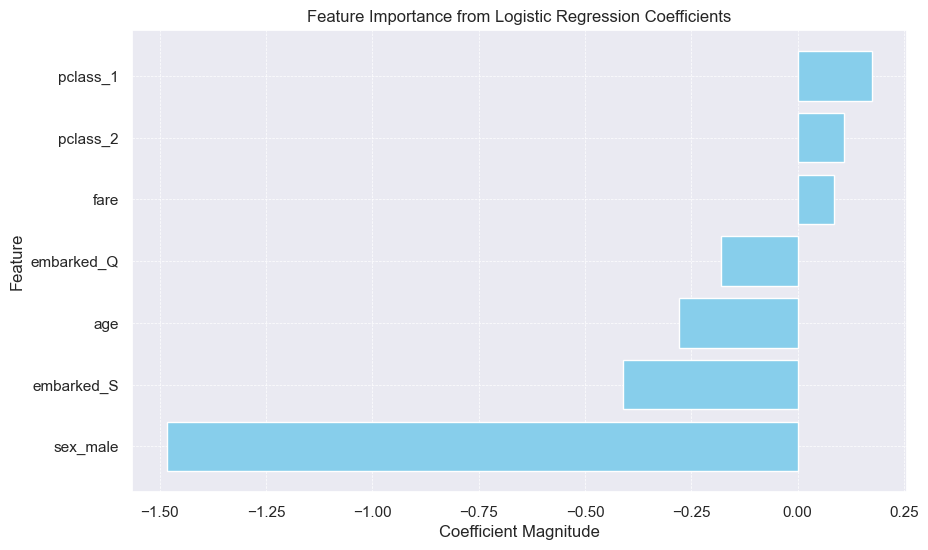

In [36]:
# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# # Load data
df = sns.load_dataset("titanic")
data = df.copy()



# Simple data cleaning
data.dropna(inplace=True)

data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass'])

# Features and target variable
X = data[['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2', 'embarked_Q', 'embarked_S']]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)


# Zack added this
print(classification_report(y_test, y_pred))

# Extract coefficients
coefs = clf.coef_[0]
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## My prompt to chatCHPT
```If you use the titanic data set and use Logistic Regression to predict if someone survived or died and you use, how do you gain information or explain how impactful each variable is for if someone dies or survives?  how do teach this simply in python. i want to show or graph which features are the most important.```

The output was super long, had errors, and small bugs, I fixed it, removed some things and added some things. All in all its like 90% ChatGPT code and 10%. 

* But there was an error i didn't catch at first, but after carefully reading each line of code, found it.  I left it in to see if you can find it too.  Its near the top. 

# Can you spot the error that happened basically right away. 

In [10]:
# Adding cells below to block the fix i made. 

(891, 6)
(712, 6)
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.87      0.63      0.73        63

    accuracy                           0.80       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



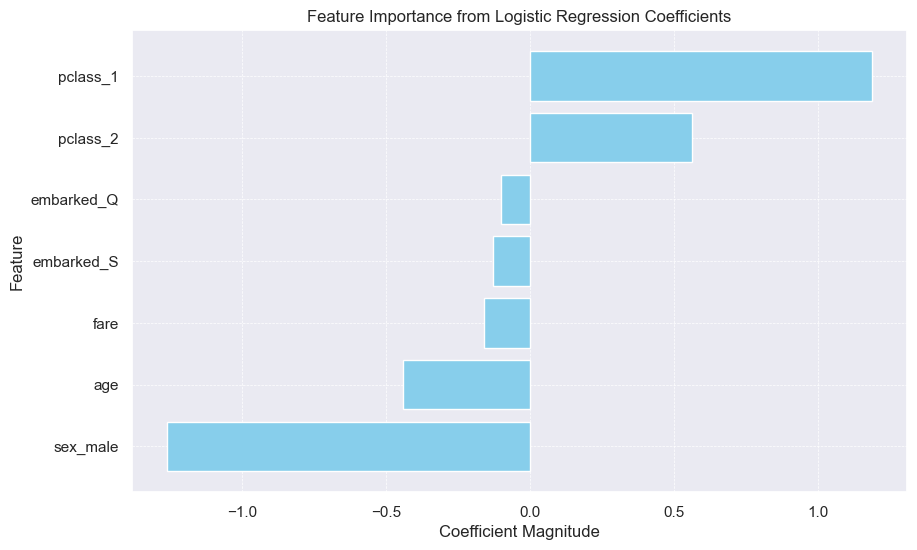

In [37]:
# THIS CODE WAS GENERATED BY CHAT-GPT 4
# MODIFITYED TO REMOVE ERROR AND OTHER BY ZACK

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()


## Zack added this and fixed the huge drop na mistake.
model_columns = [ 'survived', 'pclass', 'sex', 'age', 'fare', 'embarked']


data = data[model_columns].copy()
print(data.shape)

# Simple data cleaning
data.dropna(inplace=True)
print(data.shape)

data = pd.get_dummies(data, columns=['sex', 'pclass', 'embarked'])


selected_features = ['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2', 'embarked_Q', 'embarked_S']

# Features and target variable
X = data[selected_features]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)



# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)


# Zack added this
print(classification_report(y_test, y_pred))

# Extract coefficients
coefs = clf.coef_[0]
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### Normalizing aka Scaling our data before we feed it into the model.  

## My Prompt to ChatCPT
```"can you explain to me in why we do standard scaling before feeding the data into our model. and what stanrdard scaling does and make it in makrdown format so i can paste it into my jupyter notebook."```

Below is ChatGPT's output:
--- 

Of course! Here's the explanation in Markdown format:

### What is Standard Scaling?

Standard scaling is a preprocessing technique used to transform data so that it has a mean (µ) of 0 and a standard deviation (σ) of 1. Mathematically, for each data point \(x\), the transformed point \(z\) is calculated as:

\[ z = \frac{x - µ}{σ} \]

Where:
- \( x \) is the original data point.
- \( µ \) is the mean of the dataset.
- \( σ \) is the standard deviation of the dataset.

---

### Why do we use Standard Scaling?

1. **Feature Magnitude**: 
    - Many algorithms, especially those that rely on computing distances or similarities between data points (like k-means clustering or k-NN), are sensitive to the scales of features. 
    - If one feature has values in the range 0-1 and another in the range 0-1000, the algorithm might be overly influenced by the larger scale feature. 
    - Standard scaling mitigates this by bringing all features to a similar scale.

2. **Model Convergence**: 
    - For optimization algorithms like gradient descent (used in neural networks and logistic regression), features on different scales might cause the optimizer to converge slowly or get stuck in local optima. 
    - Scaled features ensure a more uniform gradient, leading to faster convergence.

3. **Assumption of Standardized Features**: 
    - Some algorithms assume that the input features are centered around zero and have similar variances. 
    - For example, Regularization techniques like Lasso and Ridge work better when features are standardized because the penalty terms in these techniques are sensitive to the scales of features.

4. **Interpretability**: 
    - For models that use coefficients, like linear or logistic regression, having standardized features means that the magnitude of coefficients can provide insights into the relative importance of different features (though this approach is somewhat simplistic and other factors should also be considered).

5. **Outliers**: 
    - Standard scaling is sensitive to outliers. An extreme value can shift the mean and especially the standard deviation, making the scaling susceptible to the effects of outliers. 
    - This can be both an advantage (in capturing the effects of outliers) and a disadvantage (in amplifying the effects of outliers).

---

### In Summary:

Standard scaling is a crucial step in preprocessing when you're working with algorithms sensitive to feature scales. It ensures that all features contribute equally to the model's performance, makes optimization more efficient, and can improve the interpretability of some models. However, it's also essential to be aware of the data and any potential outliers, as standard scaling can be sensitive to them.


In [11]:
# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()

# Simple data cleaning
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass'])


# Features and target variable
X = data[['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2', 'embarked_Q', 'embarked_S']]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Zack added this
X_std_df = pd.DataFrame(X_std, columns=['age', 'fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S'])
X_std_df

,age,fare,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,0.152082,-0.100110,-1.033529,0.399043,-0.2997,-0.105409,-1.310121
1,-0.039875,-0.338485,-1.033529,0.399043,-0.2997,-0.105409,0.763288
2,1.175852,-0.354708,0.967559,0.399043,-0.2997,-0.105409,0.763288
3,-2.023430,-0.815672,-1.033529,-2.505993,-0.2997,-0.105409,0.763288
4,1.431795,-0.686543,-1.033529,0.399043,-0.2997,-0.105409,0.763288
...,...,...,...,...,...,...,...
177,0.727953,-0.345640,-1.033529,0.399043,-0.2997,-0.105409,0.763288
178,-0.167846,-0.969053,0.967559,0.399043,-0.2997,-0.105409,0.763288
179,1.303824,0.055566,-1.033529,0.399043,-0.2997,-0.105409,-1.310121
180,-1.063646,-0.641315,-1.033529,0.399043,-0.2997,-0.105409,0.763288


In [12]:
# Doing the same thing, but using stats models.  And removing Embarked

(891, 5)
(714, 5)
Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                  0.3290
Time:                        10:45:07   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.919e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5211      0.100     -5.223      0.000      -0.717      -0.326
age        

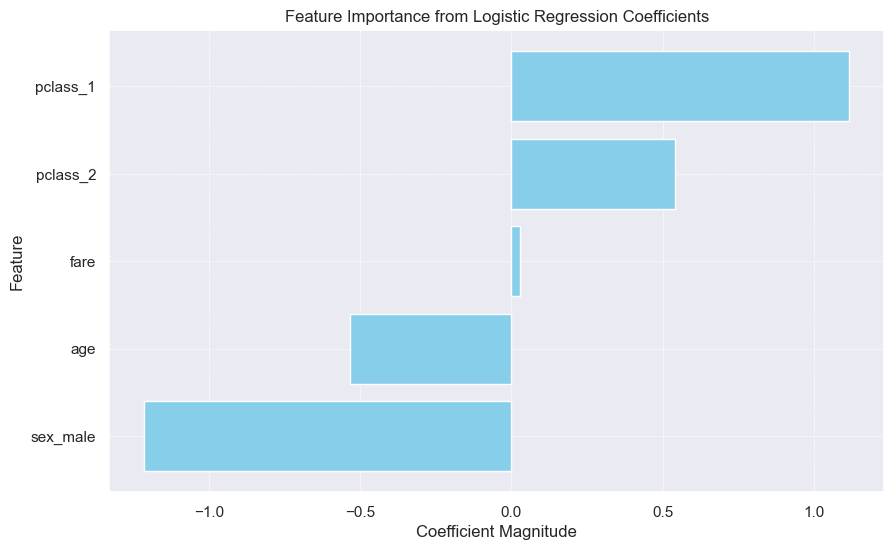

In [3]:
# Do the same thing but using stats models.
import pandas as pd
import numpy as np
import statsmodels.api as sm


# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()


# ZACK ERROR FIX
model_columns = [ 'survived', 'pclass', 'sex', 'age', 'fare']

data = data[model_columns].copy()
print(data.shape)
# Simple data cleaning
data.dropna(inplace=True)
print(data.shape)

data = pd.get_dummies(data, columns=['sex', 'pclass'])

selected_features = ['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2']

# Features and target variable
X = data[selected_features]
y = data['survived']

# Without this we get an error 
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std_df = pd.DataFrame(X_std, columns=selected_features)

# Add a constant (intercept) to the features matrix
X_const = sm.add_constant(X_std_df)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X_const)
result = model.fit()

print(result.summary())
coefficients = result.params[1:]
coefficients

features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefficients})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()





## Input prompt 

## MY PROMPT TO CHAT GPT
```
using this logistic regression results summary below for predicting survival in the titanic dataset.  tell me which features are most important and why.  please provide your output in markdown format so i can paste it into my jupyter notebook.


 Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.3290
Time:                        21:23:12   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.919e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5211      0.100     -5.223      0.000      -0.717      -0.326
age           -0.5332      0.112     -4.750      0.000      -0.753      -0.313
fare           0.0276      0.119      0.231      0.817      -0.206       0.262
sex_male      -1.2129      0.100    -12.096      0.000      -1.409      -1.016
pclass_1       1.1155      0.144      7.754      0.000       0.834       1.397
pclass_2       0.5420      0.105      5.159      0.000       0.336       0.748
==============================================================================
``````  

# FULL COPY FROM CHAT GTP.
Of course, here's the explanation in markdown format:

---

## Analysis of Logistic Regression Results:

To determine the importance of features in a logistic regression model, we often consider the following:

1. **Coefficients (coef)**: 
    - These provide the log odds. The larger the absolute value of the coefficient, the stronger the relationship between the feature and the dependent variable (`survived`, in this context). A positive coefficient indicates that the odds of survival increase as the feature increases, while a negative coefficient indicates the opposite.
   
2. **Z-score**: 
    - This indicates how many standard deviations a coefficient is from 0. A higher absolute z-score suggests a more significant relationship between the feature and the dependent variable.
   
3. **P-value (P>|z|)**: 
    - A smaller p-value indicates that the feature is statistically significant in predicting the outcome. Typically, p-values less than 0.05 are considered statistically significant.

From the summary:

1. **sex_male**: 
    - **Coef**: -1.2129
    - **Z**: -12.096
    - **P-value**: < 0.000
    - **Implication**: The negative coefficient implies being male significantly decreases the odds of survival. It has the highest absolute z-value, suggesting it's the most significant predictor in the model.

2. **pclass_1**: 
    - **Coef**: 1.1155
    - **Z**: 7.754
    - **P-value**: < 0.000
    - **Implication**: Being in first class (`pclass_1`) significantly increases the odds of survival. Its z-value is high, signifying its importance.

3. **pclass_2**: 
    - **Coef**: 0.5420
    - **Z**: 5.159
    - **P-value**: < 0.000
    - **Implication**: Being in the second class (`pclass_2`) also increases the odds of survival but not as much as the first class.

4. **age**: 
    - **Coef**: -0.5332
    - **Z**: -4.750
    - **P-value**: < 0.000
    - **Implication**: Age has a negative relationship with survival, meaning as age increases, the odds of survival decrease.

5. **fare**: 
    - **Coef**: 0.0276
    - **Z**: 0.231
    - **P-value**: 0.817
    - **Implication**: Fare has a weak positive relationship with survival, but given its high p-value, it's not statistically significant.

### Conclusion:

- **Most Important Feature**: `sex_male` is the most important due to its highest absolute coefficient and z-value.
- **Next in Line**: `pclass_1` and `pclass_2` are also crucial given their significant coefficients and z-values.
- **Least Important Feature**: `fare` is the least important since it's not statistically significant.

The order of importance based on the coefficients' magnitude and significance is: `sex_male`, `pclass_1`, `pclass_2`, `age`, and then `fare`.

---

(891, 5)
(714, 5)
Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                0.004445
Time:                        10:53:02   Log-Likelihood:                -480.11
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                   0.03839
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3823      0.076     -5.000      0.000      -0.532      -0.232
age        

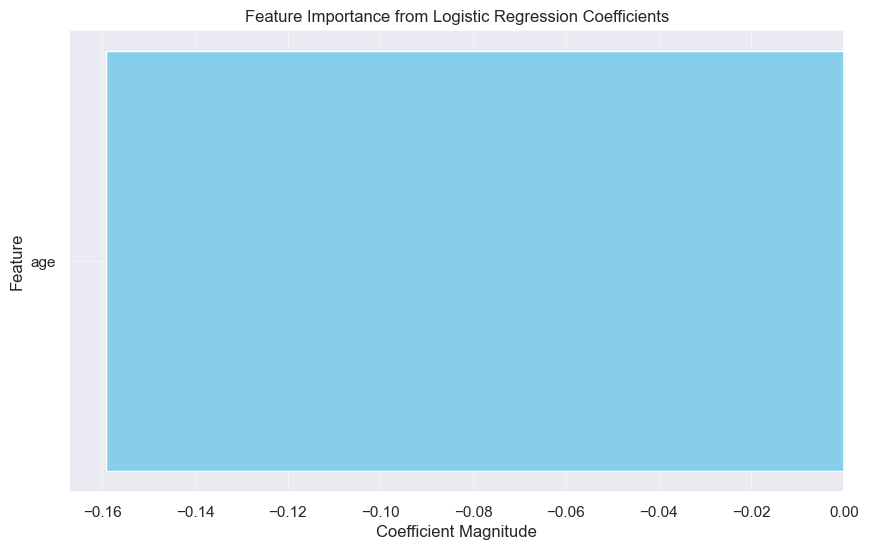

In [5]:
# Do the same thing but using stats models.
import pandas as pd
import numpy as np
import statsmodels.api as sm


# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()


# ZACK ERROR FIX
model_columns = [ 'survived', 'pclass', 'sex', 'age', 'fare']

data = data[model_columns].copy()
print(data.shape)
# Simple data cleaning
data.dropna(inplace=True)
print(data.shape)

data = pd.get_dummies(data, columns=['sex', 'pclass'])

selected_features = ['age']

# Features and target variable
X = data[selected_features]
y = data['survived']

# Without this we get an error 
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std_df = pd.DataFrame(X_std, columns=selected_features)

# Add a constant (intercept) to the features matrix
X_const = sm.add_constant(X_std_df)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X_const)
result = model.fit()

print(result.summary())
coefficients = result.params[1:]
coefficients

features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefficients})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()





In [31]:
# performing predictions on the test dataset 
# yhat = model.predict(X_const[1]) 
# prediction = list(map(round, yhat)) 
# yhat
# comparing original and predicted values of y 
# print('Actual values', list(X_const.values)) 
# print('Predictions :', prediction) 

model.predict(X_const.iloc[0])

array([0.78267088, 0.66745887, 0.75678863, 0.6913256 , 0.6913256 ,
       0.52800292, 0.88205447, 0.75000079, 0.82829507, 0.87423759,
       0.4914965 , 0.79484356, 0.65930029, 0.82829507, 0.51888912,
       0.88205447, 0.72161169, 0.6913256 , 0.69906733, 0.82303626,
       0.74308782, 0.85727162, 0.66745887, 0.80073734, 0.6510462 ,
       0.41913876, 0.74308782, 0.63426734, 0.78882144, 0.80650301,
       0.82829507, 0.6510462 , 0.75000079, 0.87820003, 0.80073734,
       0.80650301, 0.86168404, 0.78882144, 0.57317375, 0.73605097,
       0.42805937, 0.78882144, 0.7395848 , 0.87016531, 0.84332802,
       0.78267088, 0.66745887, 0.60848732, 0.87423759, 0.73605097,
       0.80073734, 0.81214099, 0.75678863, 0.71421283, 0.81765184,
       0.78882144, 0.75678863, 0.71421283, 0.76345029, 0.88642958,
       0.7288917 , 0.78267088, 0.73605097, 0.74308782, 0.81214099,
       0.70669726, 0.81765184, 0.77639196, 0.76998495, 0.73605097,
       0.79484356, 0.59974953, 0.75678863, 0.48236885, 0.37542

In [34]:
df = pd.read_csv('data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(714, 5)
Optimization terminated successfully.
         Current function value: 0.433508
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                  0.3569
Time:                        11:32:35   Log-Likelihood:                -216.32
converged:                       True   LL-Null:                       -336.39
Covariance Type:            nonrobust   LLR p-value:                 7.153e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7716      0.649      7.351      0.000       3.499       6.044
age           -0.046

/var/folders/yb/hf5hzk391w9157dctx7yzyn80000gn/T/ipykernel_49828/4072387114.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


<Axes: xlabel='y_pred_proba', ylabel='age'>

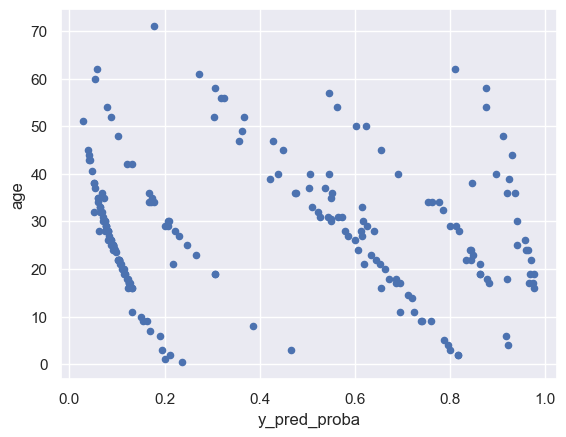

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Step 1: Load the Titanic Dataset
# Assuming you have the dataset as a CSV file named 'titanic.csv'.
df = pd.read_csv('data/titanic.csv')

# Step 2: Make All Column Names Lowercase
df.columns = df.columns.str.lower()

# Step 3: Data Preparation
# Drop rows with missing target or missing important features
df.dropna(subset=['survived', 'age', 'fare'], inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df = pd.get_dummies(df, columns=['sex', 'pclass'], dtype=int ,drop_first=True)

# Step 4: Define Features and Target
X = df[['age', 'fare', 'sex_male', 'pclass_2', 'pclass_3']]  # Using age, fare, sex, pclass
y = df['survived']

# # Step 5: Ensure All Features Are Numeric
# # Convert all columns to numeric (handle any issues with mixed types)
# X = X.apply(pd.to_numeric, errors='coerce')
# y = pd.to_numeric(y, errors='coerce')
print(X.shape)
# # Handle any remaining missing values that may result from conversion
X.fillna(X.mean(), inplace=True)

# # Step 6: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Fit the Logistic Regression Model using Statsmodels
X_train_sm = sm.add_constant(X_train)  # Adding a constant term for intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Step 8: Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred_prob
X_test_sm['y_pred_proba'] = y_pred_prob
X_test_sm

X_test_sm.plot(kind='scatter', y='age', x='y_pred_proba')
# y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (using 0.5 as threshold)

# # Step 9: Evaluate Model Performance
# from sklearn.metrics import confusion_matrix, classification_report

# # Generate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Generate a classification report
# class_report = classification_report(y_test, y_pred)
# print("\nClassification Report:")
# print(class_report)


(714, 1)
Optimization terminated successfully.
         Current function value: 0.668430
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                0.008460
Time:                        11:34:21   Log-Likelihood:                -333.55
converged:                       True   LL-Null:                       -336.39
Covariance Type:            nonrobust   LLR p-value:                   0.01704
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0523      0.208      0.251      0.802      -0.356       0.460
age           -0.014

/var/folders/yb/hf5hzk391w9157dctx7yzyn80000gn/T/ipykernel_49828/3277647831.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


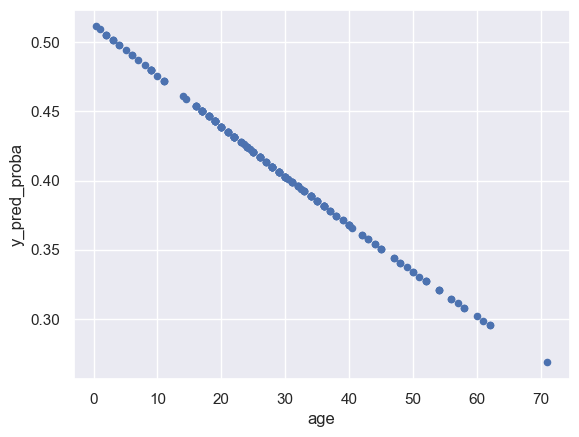

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Step 1: Load the Titanic Dataset
# Assuming you have the dataset as a CSV file named 'titanic.csv'.
df = pd.read_csv('data/titanic.csv')

# Step 2: Make All Column Names Lowercase
df.columns = df.columns.str.lower()

# Step 3: Data Preparation
# Drop rows with missing target or missing important features
df.dropna(subset=['survived', 'age', 'fare'], inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df = pd.get_dummies(df, columns=['sex', 'pclass'], dtype=int ,drop_first=True)

# Step 4: Define Features and Target
X = df[['age']]  # Using age, fare, sex, pclass
y = df['survived']

# # Step 5: Ensure All Features Are Numeric
# # Convert all columns to numeric (handle any issues with mixed types)
# X = X.apply(pd.to_numeric, errors='coerce')
# y = pd.to_numeric(y, errors='coerce')
print(X.shape)
# # Handle any remaining missing values that may result from conversion
X.fillna(X.mean(), inplace=True)

# # Step 6: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Fit the Logistic Regression Model using Statsmodels
X_train_sm = sm.add_constant(X_train)  # Adding a constant term for intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Step 8: Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred_prob
X_test_sm['y_pred_proba'] = y_pred_prob
X_test_sm

X_test_sm.plot(kind='scatter', x='age', y='y_pred_proba')
# y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (using 0.5 as threshold)

# # Step 9: Evaluate Model Performance
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


In [54]:
import numpy as np

def interpret_statsmodels_logit(result):
    """
    Converts the coefficients of a statsmodels Logit object (log-odds) into odds ratios and percentage changes.

    Parameters:
    result (statsmodels object): The fitted statsmodels logistic regression model.

    Returns:
    None: Prints the log-odds, odds ratio, and percentage change for each coefficient.
    """
    # Extract the coefficients from the statsmodels results object
    coefficients = result.params

    # Loop through each coefficient and interpret it
    print("Interpretation of Logistic Regression Coefficients:")
    print("-------------------------------------------------")
    for feature, log_odds in coefficients.items():
        # Convert log-odds to odds ratio
        odds_ratio = np.exp(log_odds)

        # Convert odds ratio to percentage change
        percentage_change = (odds_ratio - 1) * 100

        # Print the interpretation
        print(f"Feature: {feature}")
        print(f"  Log-Odds: {log_odds:.4f}")
        print(f"  Odds Ratio: {odds_ratio:.4f}")
        print(f"  Percentage Change in Odds: {percentage_change:.2f}%")
        print("")

# Example usage
# Assuming `result` is your fitted statsmodels logistic regression object from the earlier code
interpret_statsmodels_logit(result)


Interpretation of Logistic Regression Coefficients:
-------------------------------------------------
Feature: const
  Log-Odds: 0.0523
  Odds Ratio: 1.0537
  Percentage Change in Odds: 5.37%

Feature: age
  Log-Odds: -0.0149
  Odds Ratio: 0.9852
  Percentage Change in Odds: -1.48%



AttributeError: 'LogitResults' object has no attribute 'resid'

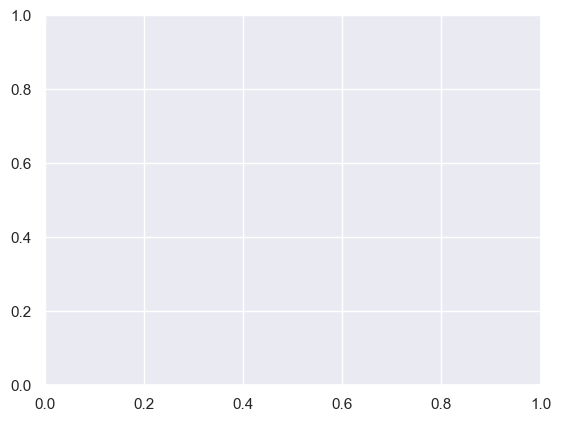

In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assume you have already fitted a logistic regression model with statsmodels
# and `X_train_sm` is the feature set with a constant term added
fig = sm.graphics.plot_ccpr(result, 'age')
plt.show()


/var/folders/yb/hf5hzk391w9157dctx7yzyn80000gn/T/ipykernel_49828/3847421900.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_summary = df_plot.groupby('age_bin').agg({'y_true': 'mean', 'y_pred_prob': 'mean'})


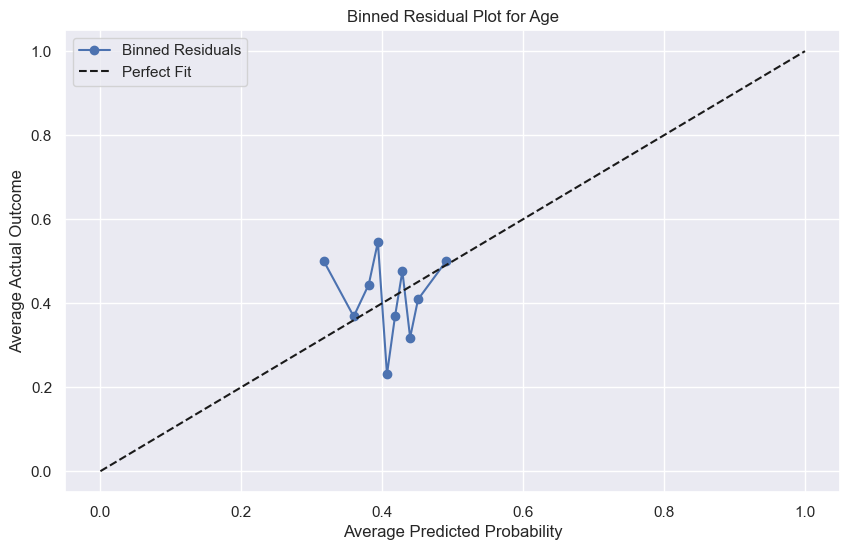

In [57]:

# Create a DataFrame with the actual and predicted values for age
df_plot = pd.DataFrame({'age': X_test['age'], 'y_true': y_test, 'y_pred_prob': y_pred_prob})

# Bin age into equal-sized bins (e.g., 10 bins)
df_plot['age_bin'] = pd.qcut(df_plot['age'], q=10)

# Calculate the average predicted probability and the average actual value for each bin
binned_summary = df_plot.groupby('age_bin').agg({'y_true': 'mean', 'y_pred_prob': 'mean'})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(binned_summary['y_pred_prob'], binned_summary['y_true'], 'o-', label='Binned Residuals')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Fit')  # Reference line
plt.xlabel('Average Predicted Probability')
plt.ylabel('Average Actual Outcome')
plt.title('Binned Residual Plot for Age')
plt.legend()
plt.show()

/var/folders/yb/hf5hzk391w9157dctx7yzyn80000gn/T/ipykernel_49828/4206256284.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_summary = df_plot.groupby('age_bin').agg({


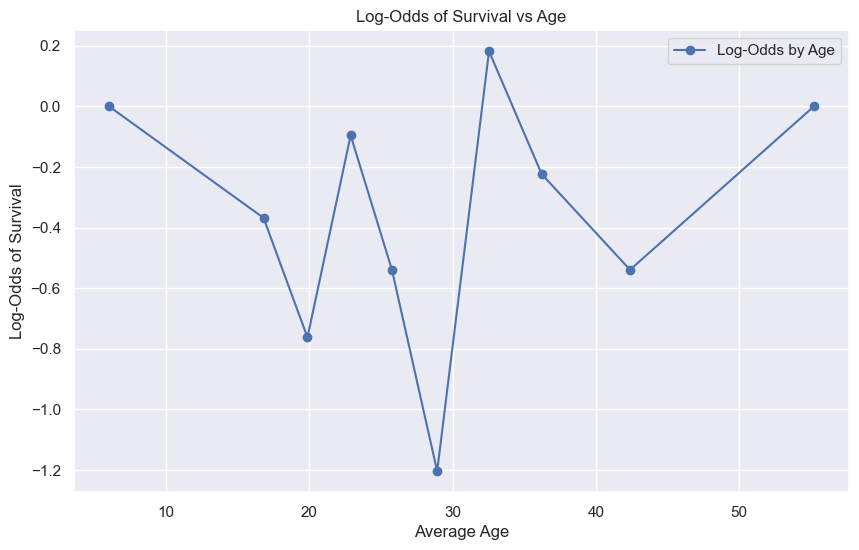

In [58]:
# Create bins for the 'age' feature
df_plot['age_bin'] = pd.qcut(df_plot['age'], q=10)

# Calculate average age, average log-odds, and average actual outcome for each bin
binned_summary = df_plot.groupby('age_bin').agg({
    'age': 'mean',
    'y_true': ['mean', 'count']
})

# Calculate log-odds for each bin (avoid 0/1 to prevent log issues)
binned_summary.columns = ['age_mean', 'y_true_mean', 'count']
binned_summary['log_odds'] = np.log(binned_summary['y_true_mean'] / (1 - binned_summary['y_true_mean']))

# Plot average log-odds against age
plt.figure(figsize=(10, 6))
plt.plot(binned_summary['age_mean'], binned_summary['log_odds'], 'o-', label='Log-Odds by Age')
plt.xlabel('Average Age')
plt.ylabel('Log-Odds of Survival')
plt.title('Log-Odds of Survival vs Age')
plt.legend()
plt.show()


/var/folders/yb/hf5hzk391w9157dctx7yzyn80000gn/T/ipykernel_49828/4206256284.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_summary = df_plot.groupby('age_bin').agg({


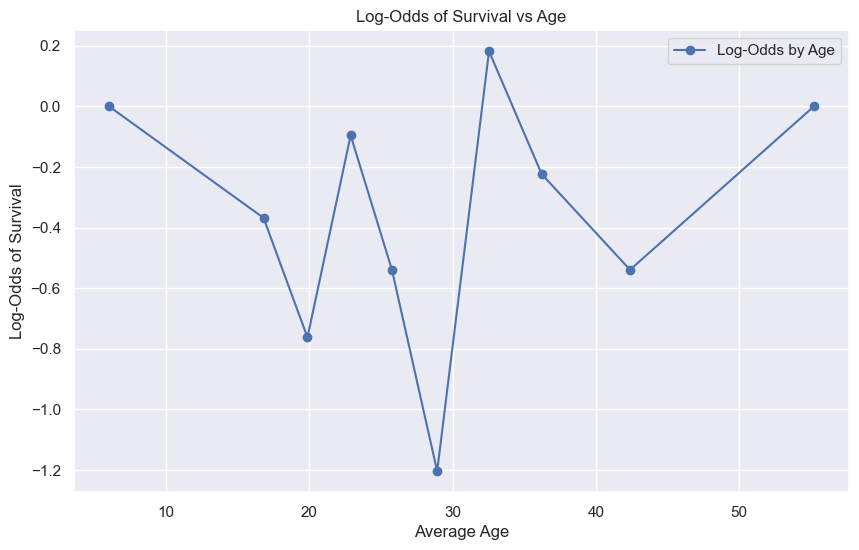

In [59]:
# Create bins for the 'age' feature
df_plot['age_bin'] = pd.qcut(df_plot['age'], q=10)

# Calculate average age, average log-odds, and average actual outcome for each bin
binned_summary = df_plot.groupby('age_bin').agg({
    'age': 'mean',
    'y_true': ['mean', 'count']
})

# Calculate log-odds for each bin (avoid 0/1 to prevent log issues)
binned_summary.columns = ['age_mean', 'y_true_mean', 'count']
binned_summary['log_odds'] = np.log(binned_summary['y_true_mean'] / (1 - binned_summary['y_true_mean']))

# Plot average log-odds against age
plt.figure(figsize=(10, 6))
plt.plot(binned_summary['age_mean'], binned_summary['log_odds'], 'o-', label='Log-Odds by Age')
plt.xlabel('Average Age')
plt.ylabel('Log-Odds of Survival')
plt.title('Log-Odds of Survival vs Age')
plt.legend()
plt.show()


In [60]:
# Adding polynomial terms to the model
X_train['age_squared'] = X_train['age'] ** 2
X_test['age_squared'] = X_test['age'] ** 2

# Fit the new model with polynomial term
X_train_sm_poly = sm.add_constant(X_train)
logit_model_poly = sm.Logit(y_train, X_train_sm_poly)
result_poly = logit_model_poly.fit()

# Print summary to check significance of the polynomial term
print(result_poly.summary())


Optimization terminated successfully.
         Current function value: 0.666716
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                 0.01100
Time:                        11:44:22   Log-Likelihood:                -332.69
converged:                       True   LL-Null:                       -336.39
Covariance Type:            nonrobust   LLR p-value:                   0.02470
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3743      0.324      1.157      0.247      -0.260       1.008
age            -0.0400    

# Lets try again, with just a little different prompt...

## MY PROMPT TO CHAT GPT
```
using this logistic regression results summary below for predicting survival in the titanic dataset.  tell me which features are most important and why.  
 Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.3290
Time:                        21:23:12   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.919e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5211      0.100     -5.223      0.000      -0.717      -0.326
age           -0.5332      0.112     -4.750      0.000      -0.753      -0.313
fare           0.0276      0.119      0.231      0.817      -0.206       0.262
sex_male      -1.2129      0.100    -12.096      0.000      -1.409      -1.016
pclass_1       1.1155      0.144      7.754      0.000       0.834       1.397
pclass_2       0.5420      0.105      5.159      0.000       0.336       0.748
==============================================================================
``````

--
# Chat gpt's response... 

To determine which features are most important in this logistic regression model predicting survival on the Titanic, we can look at the following:

1. **Coefficient Values (coef)**: A higher absolute value of the coefficient means that the feature has a stronger effect on the prediction. A positive coefficient increases the log odds of the response (and thus increases the probability), and a negative coefficient decreases the log odds of the response (and thus decreases the probability).

2. **P-values (P>|z|)**: This tells us if the variable is significant in predicting the response. A smaller p-value indicates that you can reject the null hypothesis, meaning the predictor variable is statistically significant. A commonly used threshold is 0.05. If the p-value is less than this threshold, then the predictor is considered significant.

Let's analyze:

- **age**: 
  - coef = -0.5332: It's a negative coefficient, meaning as age increases, the odds of survival decrease.
  - P-value = 0.000: It's less than 0.05, so age is statistically significant.
  
- **fare**: 
  - coef = 0.0276: It's a positive coefficient but very small, meaning fare has a slight positive effect on survival, but the effect is not strong.
  - P-value = 0.817: It's much larger than 0.05, indicating fare is not statistically significant in predicting survival.
  
- **sex_male**: 
  - coef = -1.2129: It's a negative coefficient, suggesting males have lower odds of survival compared to females.
  - P-value = 0.000: It's statistically significant.
  
- **pclass_2**:
  - coef = -0.5470: Passengers in 2nd class have lower odds of survival compared to those in 1st class.
  - P-value = 0.000: It's statistically significant.
  
- **pclass_3**: 
  - coef = -1.2708: Passengers in 3rd class have even lower odds of survival compared to those in 1st class (and lower than 2nd class too, since the absolute coefficient value is higher).
  - P-value = 0.000: It's statistically significant.

### Summary:

Based on the coefficients' absolute values and their respective p-values:

1. **sex_male** is the most important predictor in the model, with males having significantly lower odds of survival than females.
2. **pclass_3** is the next important, with passengers in the third class having much lower odds of survival compared to those in the first class.
3. **age** is also a significant predictor, with older passengers having lower odds of survival.
4. **pclass_2** also plays a role, where second class passengers have lower odds compared to those in the first class, but still better than the third class.
5. **fare**, despite being included in the model, does not significantly predict survival based on its high p-value. 

The features are thus ranked in importance as: `sex_male`, `pclass_3`, `age`, `pclass_2`, and then `fare`.